In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.tree as tree
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from collections import Counter
import re

In [2]:
data = pd.read_csv('booking_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75362 entries, 0 to 75361
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   name                                       75362 non-null  object 
 1   grade                                      75362 non-null  float64
 2   descriptive_grades                         75362 non-null  int64  
 3   num_of_reviews                             75362 non-null  float64
 4   breakfast                                  75362 non-null  int64  
 5   distance_from_center                       75362 non-null  float64
 6   stars                                      75362 non-null  float64
 7   price                                      75362 non-null  int64  
 8   free_cancellation                          75362 non-null  int64  
 9   no_prepayment                              75362 non-null  int64  
 10  checkin_date          

#### Adding additional features using existing variables

In [3]:
# The function to convert the string to a date
def convert_to_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

data['checkin_date'] = data['checkin_date'].apply(convert_to_date)

# Adding a feature for the day of the week based on the check-in date
def get_day_of_week(date_obj):
# Get the day of the week number (0 - Sunday, 1 - Monday, and so on)
    day_of_week = date_obj.weekday()
    return day_of_week

data['checkin_day_week'] = data['checkin_date'].apply(get_day_of_week)

In [4]:
# Adding an additional feature to the bed type that will give an indication of whether it is a couple (or more) in a room or a single person
def classify_bed_type(value):
    if value == 7 or value == 8:
        return 1
    else:
        return 0

# Replace the values ​​in the 'bed_type' column with the new classification values
data['two_beds'] = data['bed_category'].apply(classify_bed_type)

Correlations with price:
price               1.000000
two_beds            0.002013
checkin_day_week   -0.117227
Name: price, dtype: float64


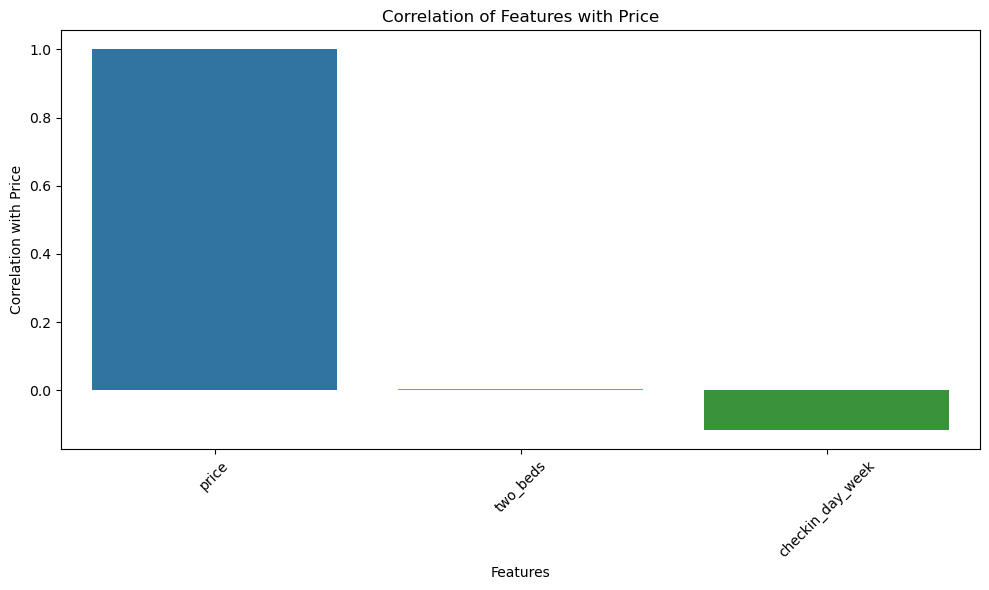

In [5]:
price_correlations = data[['price','two_beds',  'checkin_day_week']].corr()['price'].sort_values(ascending=False)

print("Correlations with price:")
print(price_correlations)

plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlations.index, y=price_correlations.values)
plt.title('Correlation of Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation with Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
data = data.drop(['name', 'checkin_date' ,'checkout_date', 'Snapshot Date'], axis=1)

In [7]:
data.describe()

grade  descriptive_grades  num_of_reviews     breakfast  \
count  75362.000000        75362.000000    75362.000000  75362.000000   
mean       8.042170            2.787227     3087.891205      0.177251   
std        0.547241            0.799487     3601.941204      0.381884   
min        4.400000            1.000000        6.000000      0.000000   
25%        7.700000            2.000000     1032.000000      0.000000   
50%        8.100000            3.000000     1882.000000      0.000000   
75%        8.400000            3.000000     3840.000000      0.000000   
max        9.500000            6.000000    22377.000000      1.000000   

       distance_from_center         stars         price  free_cancellation  \
count          75362.000000  75362.000000  75362.000000       75362.000000   
mean               2.619170      3.814947   3653.878161           0.548725   
std                1.797962      0.596977   2005.476479           0.497624   
min                0.500000      1.000000    268.000000           0.000000   
25%                1.600000      3.000000   2009.000000           0.000000   
50%                1.900000      4.000000   3449.000000           1.000000   
75%                2.700000      4.000000   5015.000000           1.000000   
max                9.900000      5.000000   9767.000000           1.000000   

       no_prepayment           TTT           LOS         order  room_category  \
count   75362.000000  75362.000000  75362.000000  75362.000000   75362.000000   
mean        0.548725     15.621494      2.961970     88.760277       5.892957   
std         0.497624      8.629850      1.409189     50.335269       3.006690   
min         0.000000      1.000000      1.000000      1.000000       1.000000   
25%         0.000000      8.000000      2.000000     45.000000       3.000000   
50%         1.000000     16.000000      3.000000     88.000000       7.000000   
75%         1.000000     23.000000      4.000000    132.000000       8.000000   
max         1.000000     30.000000      5.000000    180.000000      11.000000   

       bed_category  checkin_day_week      two_beds  
count  75362.000000      75362.000000  75362.000000  
mean       4.805406          3.018086      0.016480  
std        1.434454          2.046786      0.127315  
min        1.000000          0.000000      0.000000  
25%        4.000000          1.000000      0.000000  
50%        6.000000          3.000000      0.000000  
75%        6.000000          5.000000      0.000000  
max        8.000000          6.000000      1.000000

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# From the above, it can be seen that the data ranges for the "Number of Reviews" variable and 
# the "Distance from Center" variable are different from the rest, so we will normalize them.
columns_to_normalize = ['distance_from_center', 'num_of_reviews']

min_max_scaler = MinMaxScaler()
data_min_max_scaled = data.copy()
data_min_max_scaled[columns_to_normalize] = min_max_scaler.fit_transform(data[columns_to_normalize])

standard_scaler = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[columns_to_normalize] = standard_scaler.fit_transform(data[columns_to_normalize])

print("Original Data:")
print(data[columns_to_normalize].head())

print("\nMin-Max Scaled Data:")
print(data_min_max_scaled[columns_to_normalize].head())

print("\nStandard Scaled Data:")
print(data_standard_scaled[columns_to_normalize].head())

Original Data:
   distance_from_center  num_of_reviews
0                   1.9          4667.0
1                   1.5          3243.0
2                   6.9           534.0
3                   1.4          2484.0
4                   1.9          2028.0

Min-Max Scaled Data:
   distance_from_center  num_of_reviews
0              0.148936        0.208350
1              0.106383        0.144696
2              0.680851        0.023602
3              0.095745        0.110768
4              0.148936        0.090385

Standard Scaled Data:
   distance_from_center  num_of_reviews
0             -0.399995        0.438408
1             -0.622470        0.043063
2              2.380950       -0.709037
3             -0.678089       -0.167658
4             -0.399995       -0.294258


## Conclusion

It can be seen that the data for a number of reviews/opinions is asymmetrically distributed with a right tail. We used a minimum-maximum normalization method and ran the models on the data including the normalization.

In [9]:
data_wo_features = data_min_max_scaled.drop(['checkin_day_week' ,'two_beds'], axis=1)

# Algorithm -LinearRegression

#### Split the data to training set and test set.

DataFrame: data_min_max_scaled
--------------------------------

Intercept: -5097.675804334824
                                              Coeff
LOS                                        1182.958
neighborhood_Union Square, New York         862.647
neighborhood_Greenwich Village, New York    854.885
neighborhood_SoHo, New York                 779.047
neighborhood_Tribeca, New York              755.322
neighborhood_Upper East Side, New York      718.493
neighborhood_East Village, New York         686.124
stars                                       667.019
two_beds                                    348.709
neighborhood_East Harlem, New York          316.580
grade                                       264.594
descriptive_grades                          255.405
breakfast                                   114.253
bed_category                                 84.002
neighborhood_Gramercy, New York              79.032
free_cancellation                            70.104
no_prepayment        

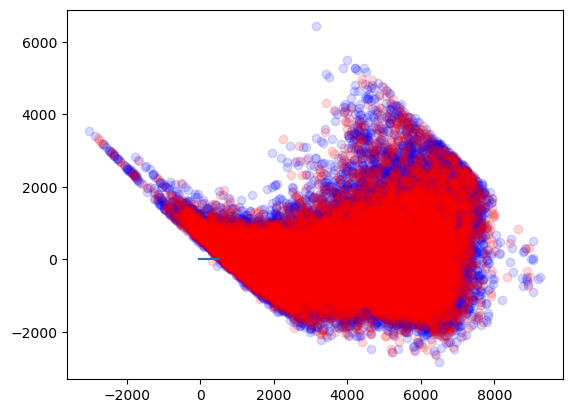

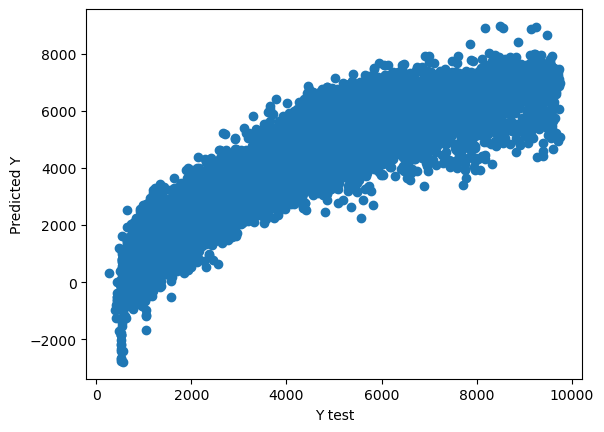

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


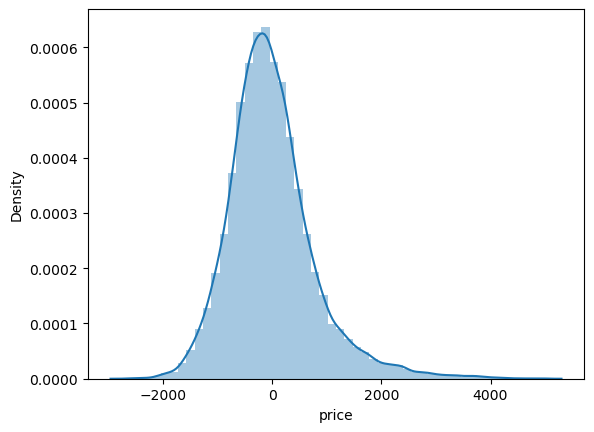

DataFrame: data_wo_features
--------------------------------

Intercept: -5429.279570099792
                                              Coeff
LOS                                        1181.671
neighborhood_Greenwich Village, New York    917.715
neighborhood_Union Square, New York         825.029
neighborhood_Tribeca, New York              806.788
neighborhood_SoHo, New York                 757.311
neighborhood_Upper East Side, New York      745.990
neighborhood_East Village, New York         684.342
stars                                       679.052
neighborhood_East Harlem, New York          297.199
grade                                       266.501
descriptive_grades                          248.018
breakfast                                   105.051
bed_category                                 92.166
free_cancellation                            83.072
no_prepayment                                83.072
neighborhood_Gramercy, New York              62.563
room_category           

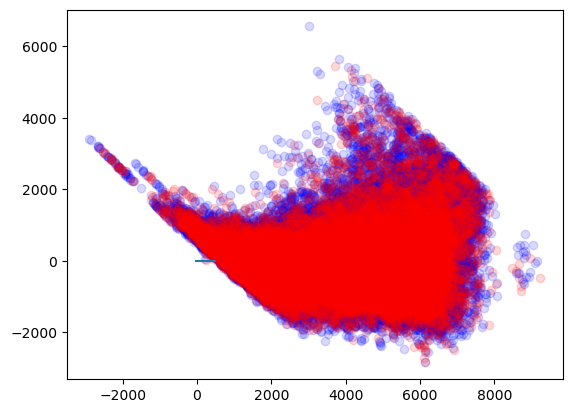

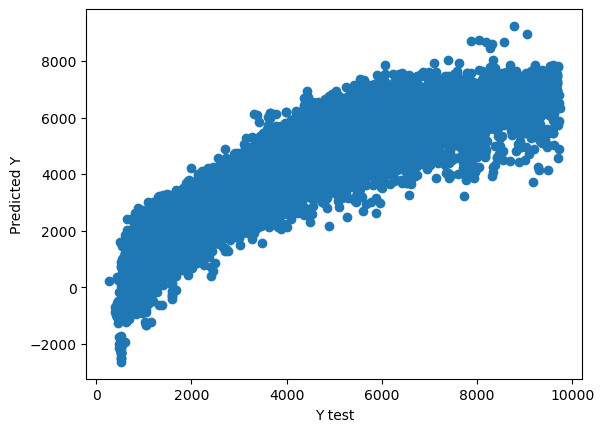

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


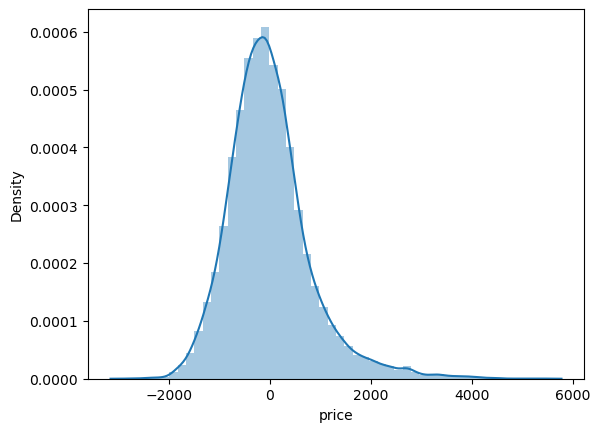

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


data_types = [data_min_max_scaled, data_wo_features]

for df in data_types:
    df_name = next(key for key, value in locals().items() if value is df)
    print(f"DataFrame: {df_name}")
    print("--------------------------------")
    print()
    
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    print(f'Intercept: {lr.intercept_}')
    
    pd.options.display.float_format = '{:.3f}'.format
    cdf = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coeff'])
    print(cdf.sort_values('Coeff', ascending=False))
    print()
        
    #### Predict the test set
    pred_test = lr.predict(X_test)
    pred_train = lr.predict(X_train)

    #### Print the relevant evaluation metrics
    print('Test MAE: ', "%.4f" % mean_absolute_error(y_test, pred_test))
    print('Test MSE: ', "%.4f" % mean_squared_error(y_test, pred_test))
    print('Test RMSE: ', "%.4f" % np.sqrt(mean_squared_error(y_test, pred_test)))
    print('Test R2: ', "%.4f" % r2_score(y_test, pred_test))
    print()
    print('Train MAE: ', "%.4f" % mean_absolute_error(y_train,pred_train))
    print('Train MSE: ', "%.4f" % mean_squared_error(y_train,pred_train))
    print('Train RMSE: ', "%.4f" % np.sqrt(mean_squared_error(y_train,pred_train)))
    print('Train R2: ', "%.4f" % r2_score(y_train,pred_train))
    print()

    #### Print a scatterplot of the real y values of the test set against the predicted y values
    plt.scatter(pred_train, y_train-pred_train, c='b',alpha=0.15)
    plt.scatter(pred_test, y_test-pred_test, c='r',alpha=0.15)
    plt.hlines(y=0,xmin=-50,xmax=500)
    plt.show()

    plt.scatter(y_test, pred_test)
    plt.xlabel('Y test')
    plt.ylabel('Predicted Y')
    plt.show()

    #### Print a histogram the residuals
    sns.distplot(y_test-pred_test)
    plt.show()



### Conclusion

The coefficient values indicate both the magnitude and the direction of the effect of each variable on the dependent variable (price).

* LOS – has a strong positive effect on the price.

* distance_from_center – has a strong negative effect on the price.

* neighborhood_Union Square, New York – has a positive effect on the price.

* stars – similarly, has a positive effect on the price, though weaker.

* free_cancellation, no_prepayment – have an identical effect on the price per night, with equal coefficient values (which may indicate that they represent the same underlying variable).

Additional Features:

It can be observed that the results obtained with the additional features are slightly better than those achieved without the added features.

two_beds, checkin_day_week – show a relatively weak relationship with the price.

# Algorithm - Decision Tree Regressor

In [11]:
from sklearn import tree
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from IPython.display import Image
import pydotplus

DataFrame: data
--------------------------------

Max_depth: 2



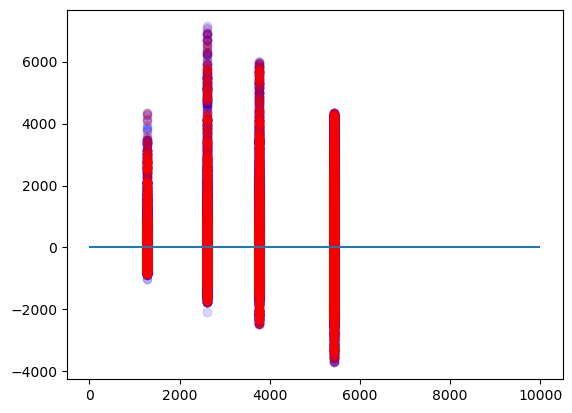

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


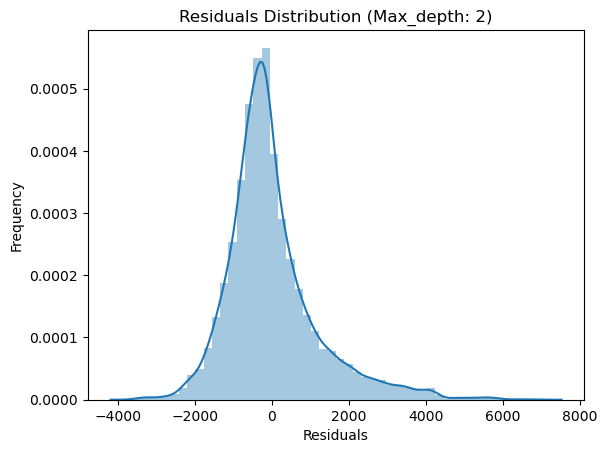

Max_depth: 3



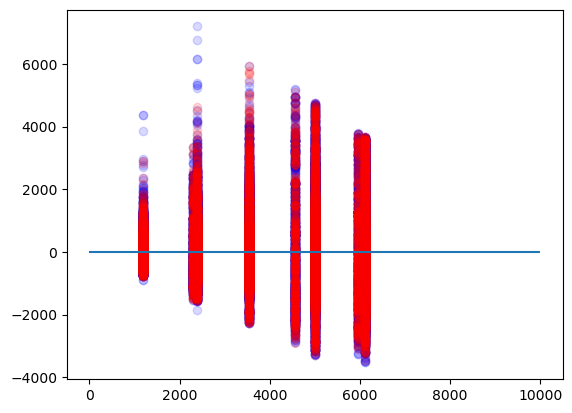

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


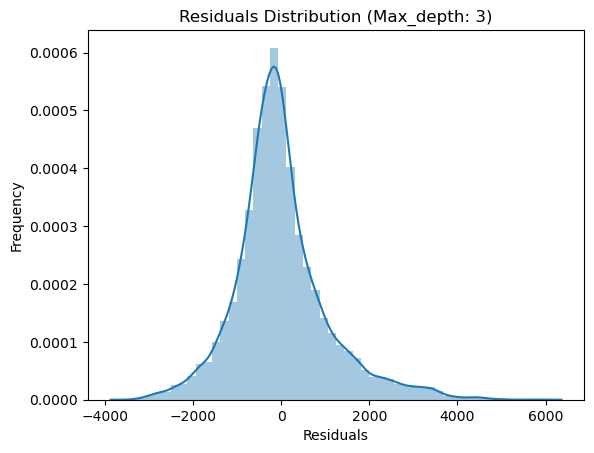

Max_depth: 5



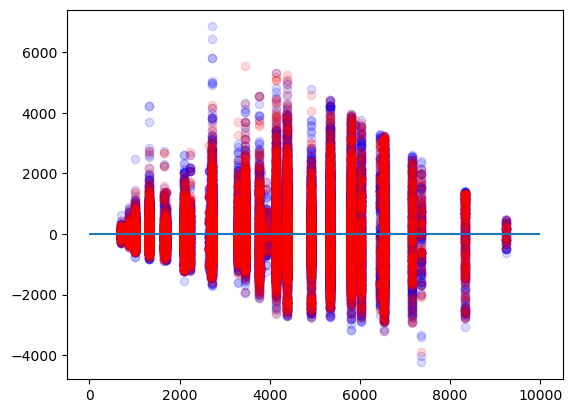

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


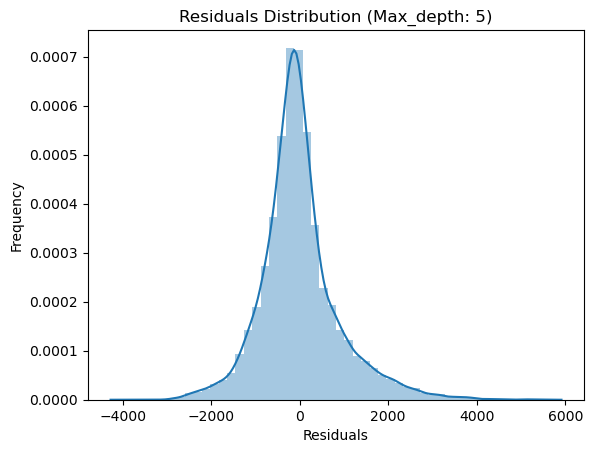

Max_depth: 8



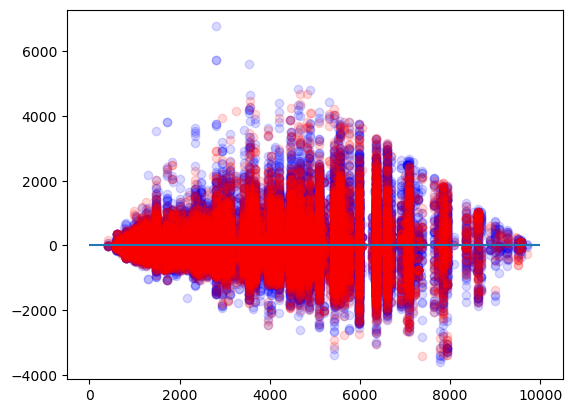

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


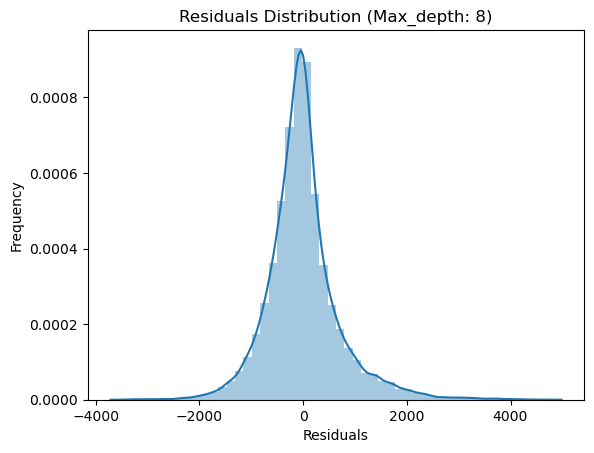

Max_depth: 10



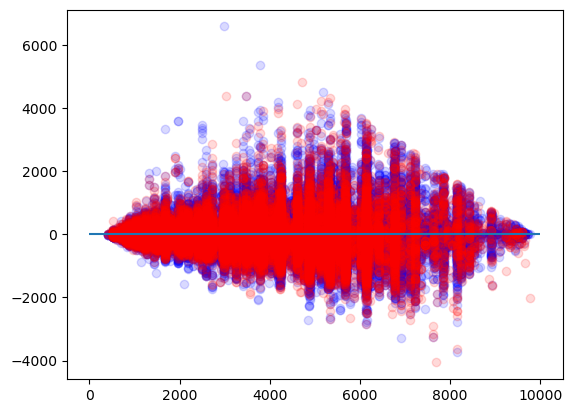

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


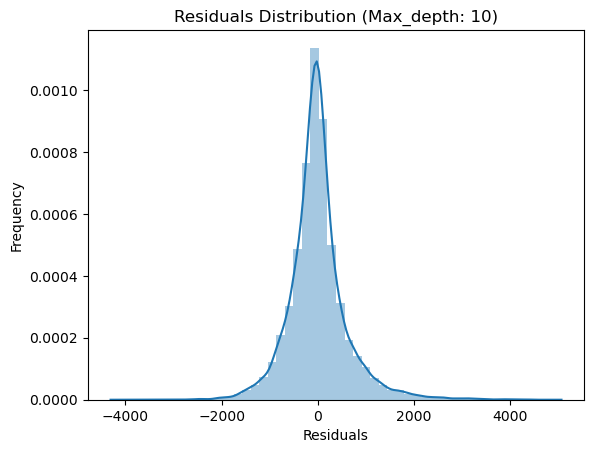

Test Set Results:
   Depth  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0      2         1428251.555                 1195.095              850.917   
1      3         1130555.623                 1063.276              760.872   
2      5          792182.038                  890.046              629.477   
3      8          501464.446                  708.142              487.207   
4     10          382459.011                  618.433              417.927   

    R^2  
0 0.644  
1 0.718  
2 0.802  
3 0.875  
4 0.905  

Train Set Results:
   Depth  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0      2         1438670.000                 1199.446              853.165   
1      3         1120797.276                 1058.677              760.819   
2      5          778032.832                  882.062              626.804   
3      8          480004.673                  692.824              481.265   
4     10          348074.384               

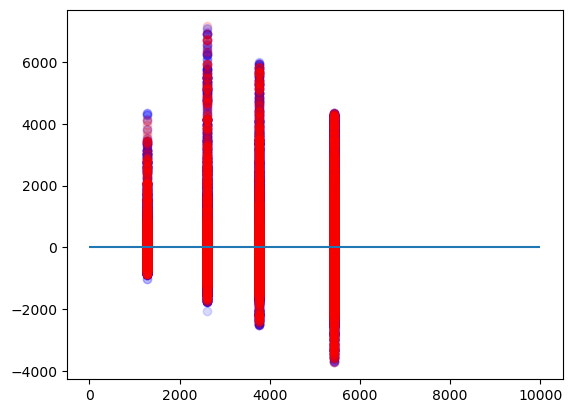

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


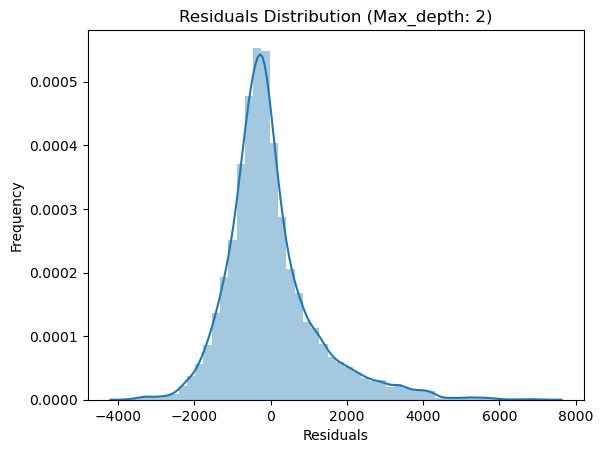

Max_depth: 3



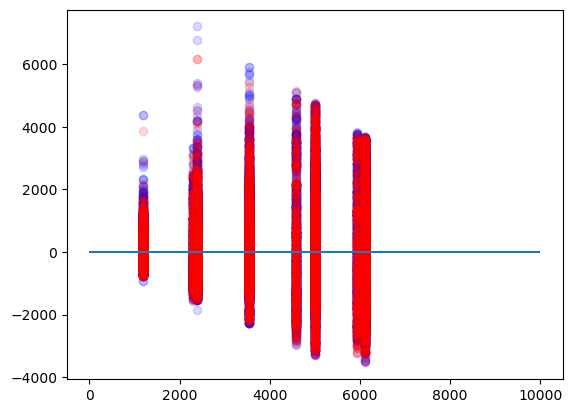

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


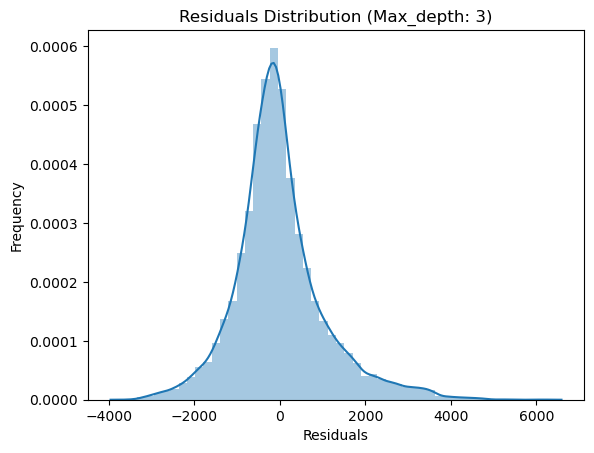

Max_depth: 5



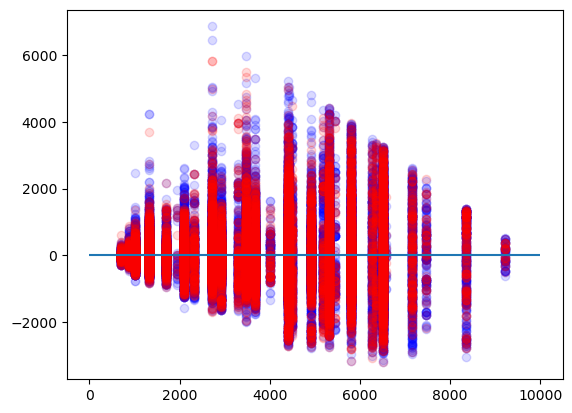

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


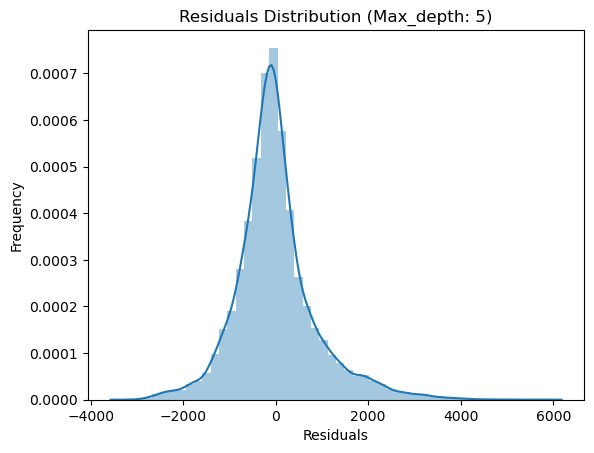

Max_depth: 8



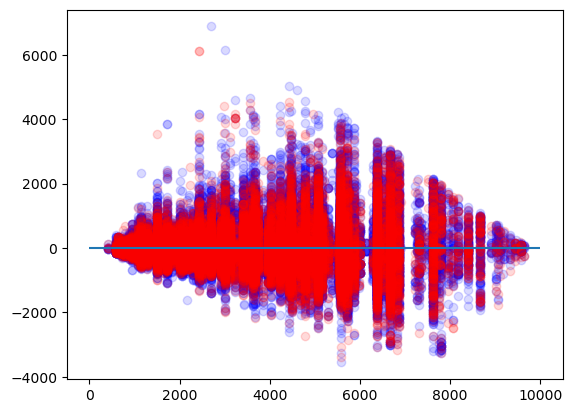

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


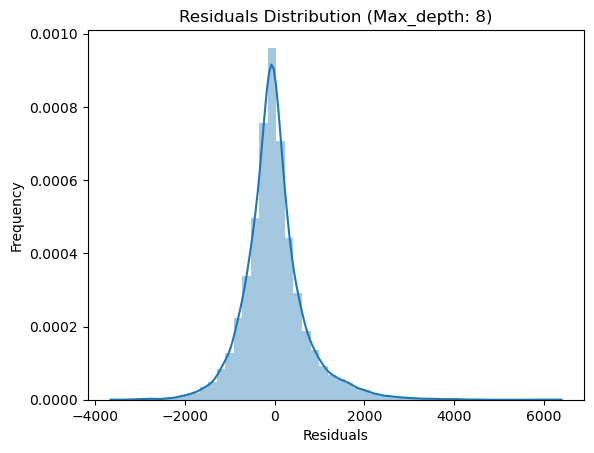

Max_depth: 10



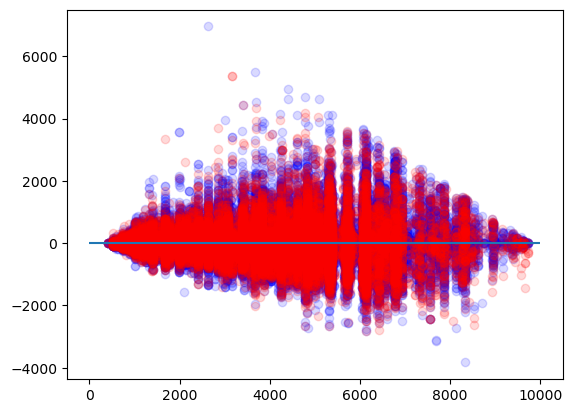

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


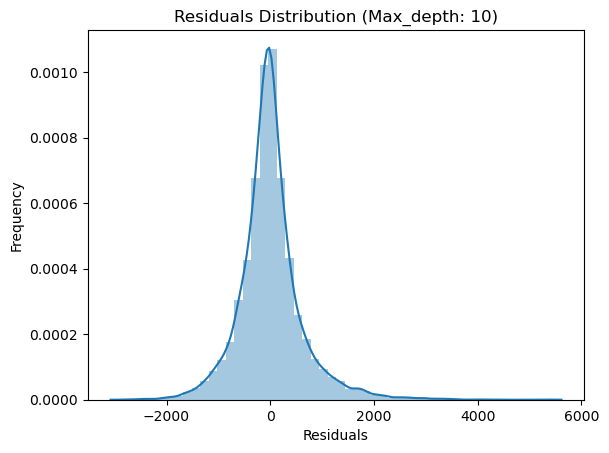

Test Set Results:
   Depth  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0      2         1414265.994                 1189.229              844.228   
1      3         1121411.075                 1058.967              759.574   
2      5          784679.398                  885.821              622.516   
3      8          493805.856                  702.713              485.836   
4     10          384501.511                  620.082              421.440   

    R^2  
0 0.646  
1 0.719  
2 0.803  
3 0.876  
4 0.904  

Train Set Results:
   Depth  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0      2         1444644.109                 1201.933              856.505   
1      3         1124692.638                 1060.515              761.706   
2      5          786105.802                  886.626              627.801   
3      8          481802.297                  694.120              482.250   
4     10          347858.158               

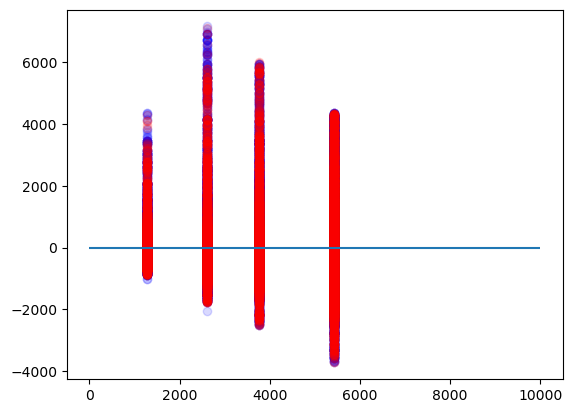

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


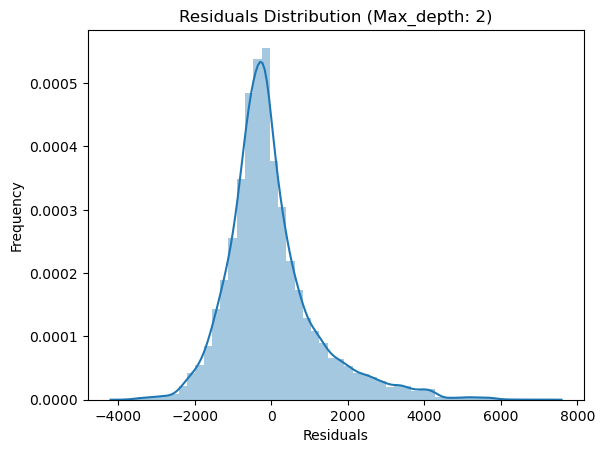

Max_depth: 3



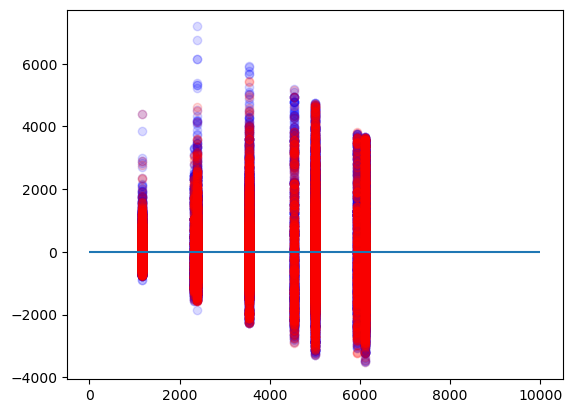

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


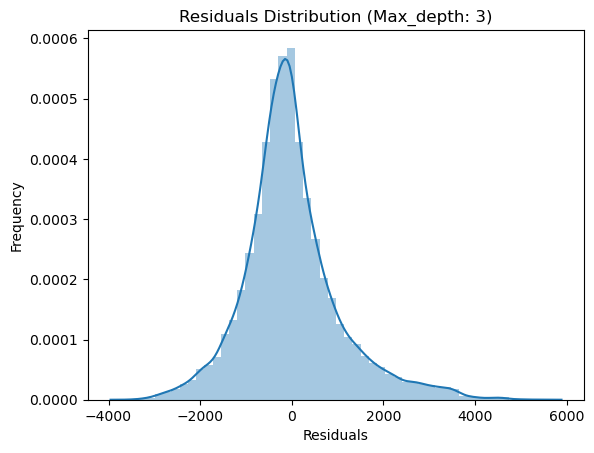

Max_depth: 5



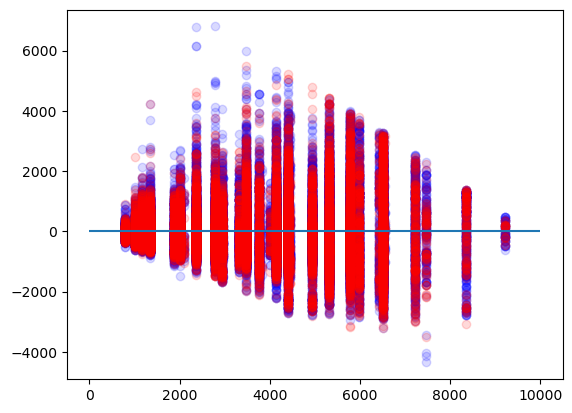

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


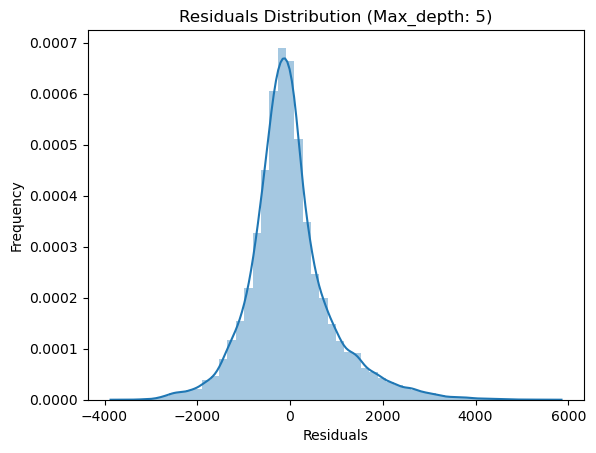

Max_depth: 8



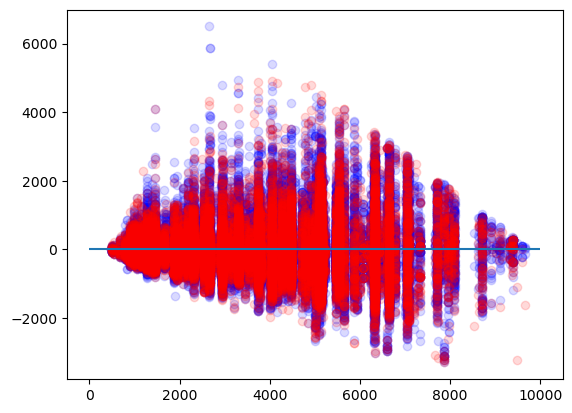

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


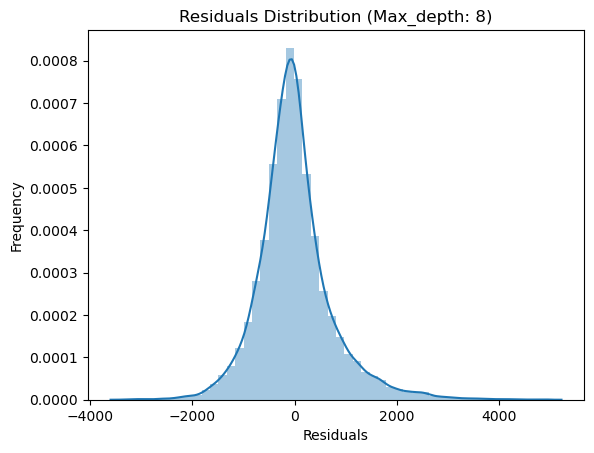

Max_depth: 10



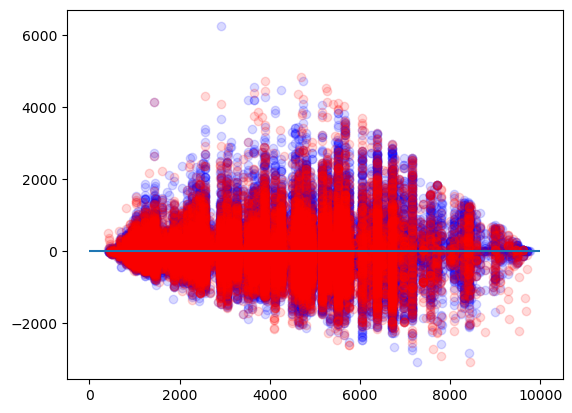

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


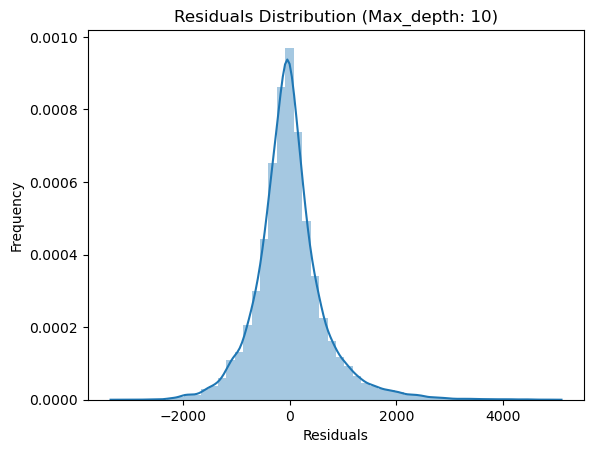

Test Set Results:
   Depth  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0      2         1436640.660                 1198.599              854.554   
1      3         1130153.299                 1063.087              764.426   
2      5          798396.279                  893.530              635.625   
3      8          546421.157                  739.203              520.657   
4     10          438382.739                  662.105              458.983   

    R^2  
0 0.643  
1 0.719  
2 0.802  
3 0.864  
4 0.891  

Train Set Results:
   Depth  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0      2         1435019.728                 1197.923              851.510   
1      3         1120899.458                 1058.725              759.779   
2      5          792038.391                  889.965              634.846   
3      8          512258.033                  715.722              505.296   
4     10          386693.155               

In [12]:
data_types = [data,data_min_max_scaled, data_wo_features]
depth_values = [2, 3, 5, 8, 10]

for df in data_types:
    df_name = next(key for key, value in locals().items() if value is df)
    print(f"DataFrame: {df_name}")
    print("--------------------------------")
    print()
    
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    results = {}
    for depth in depth_values:
        print(f"Max_depth: {depth}")
        print()
        DesTree = tree.DecisionTreeRegressor(max_depth=depth)
        DesTree.fit(X_train, y_train)
        
        #### Predict the test set
        pred_test = DesTree.predict(X_test)
        mse_test = mean_squared_error(y_test, pred_test)
        rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
        mae_test = mean_absolute_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        #### Predict the train set
        pred_train = DesTree.predict(X_train)
        mse_train = mean_squared_error(y_train,pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        #### Print a scatterplot of the real y values of the test set against the predicted y values
        plt.scatter(pred_train, y_train-pred_train, c='b',alpha=0.15)
        plt.scatter(pred_test, y_test-pred_test, c='r',alpha=0.15)
        plt.hlines(y=0,xmin=0,xmax=10000)
        plt.show()

        #### Print a histogram the residuals
        sns.distplot(y_test-pred_test)
        plt.title(f"Residuals Distribution (Max_depth: {depth})")
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.show()

        results[depth] = {
            'test': {'mse': mse_test, 'rmse': rmse_test, 'mae': mae_test, 'r2': r2_test, 'y_pred': pred_test},
            'train': {'mse': mse_train, 'rmse': rmse_train, 'mae': mae_train, 'r2': r2_train, 'y_pred': pred_train}
        }
        

    results_df_test = pd.DataFrame([(depth, res['test']['mse'], res['test']['rmse'], res['test']['mae'], res['test']['r2']) for depth, res in results.items()],
                              columns=['Depth', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])
    
    results_df_train = pd.DataFrame([(depth, res['train']['mse'], res['train']['rmse'], res['train']['mae'], res['train']['r2']) for depth, res in results.items()],
                              columns=['Depth', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])
    
    print("Test Set Results:")
    print(results_df_test)
    print()
    
    print("Train Set Results:")
    print(results_df_train)
    print()


## Conclusion
As the tree depth increases, the results improve and the model performs better; however, this may indicate overfitting.

When the tree depth is 2, 3, or 5, the results obtained are worse than those achieved by linear regression.

It can be seen that the results obtained with the additional features are slightly better than those from the data without the added features.

We ran the model several times and plan to also try a different data split, increasing the size of the test set at the expense of the training set, in order to examine the impact.

## Use different split of the data (to training set and test set)

DataFrame: data
--------------------------------

Test_size: 0.2



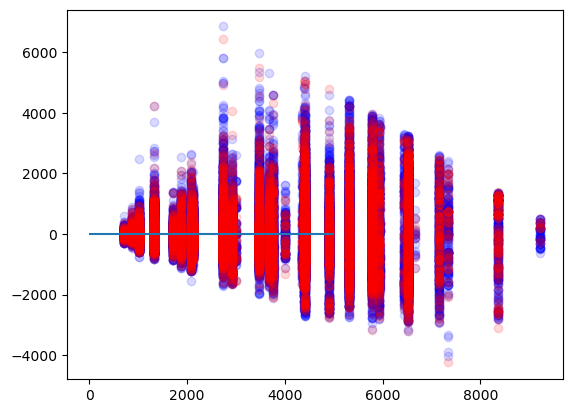

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


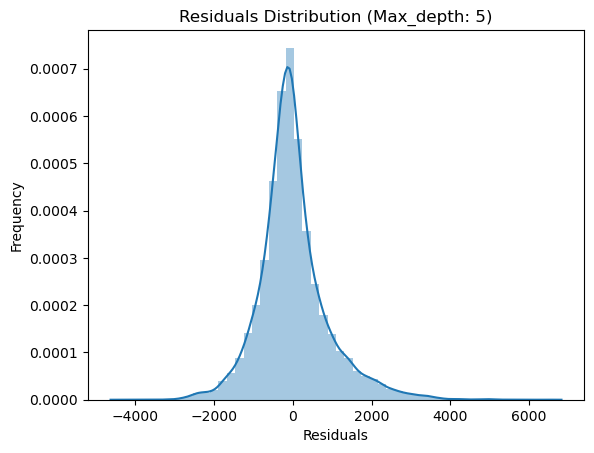

Test_size: 0.4



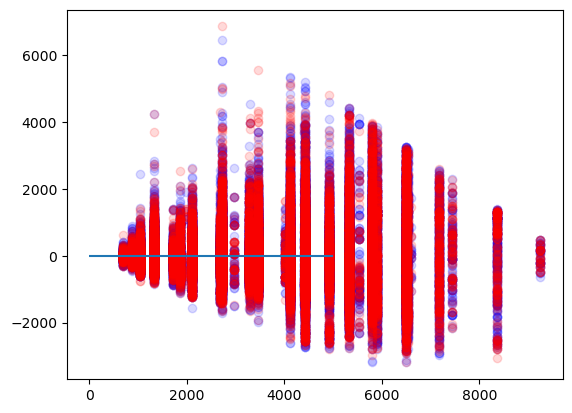

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


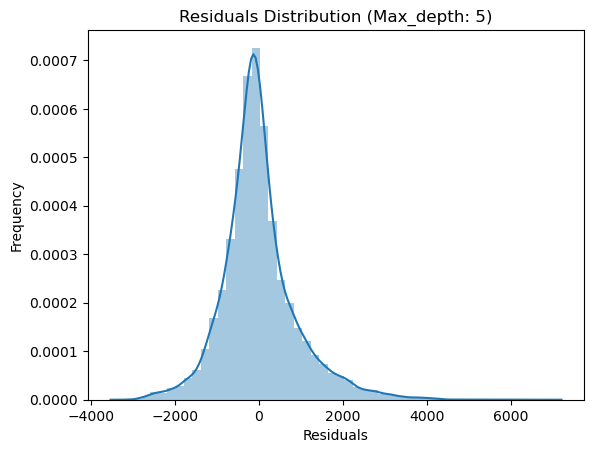

Test_size: 0.5



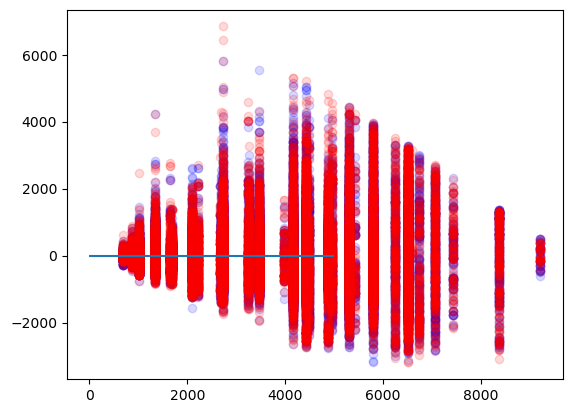

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


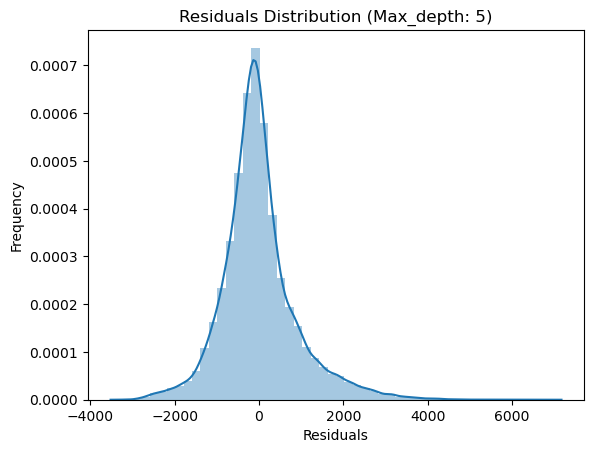

Test Set Results:
   Size  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0 0.200          785987.666                  886.559              626.824   
1 0.400          794821.796                  891.528              632.301   
2 0.500          790115.274                  888.884              628.470   

    R^2  
0 0.805  
1 0.802  
2 0.804  

Train Set Results:
   Size  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0 0.200          782921.338                  884.828              627.447   
1 0.400          775203.825                  880.457              624.018   
2 0.500          780474.417                  883.445              626.480   

    R^2  
0 0.805  
1 0.807  
2 0.805  

DataFrame: data_min_max_scaled
--------------------------------

Test_size: 0.2



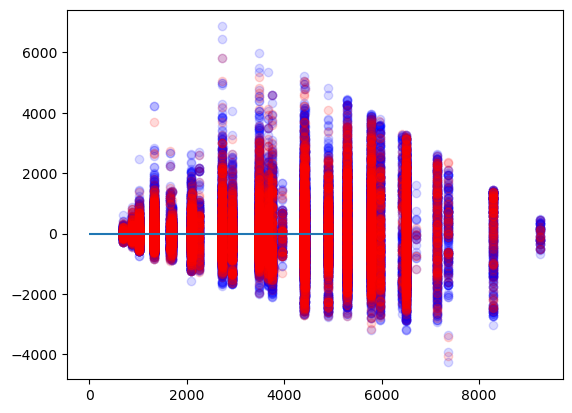

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


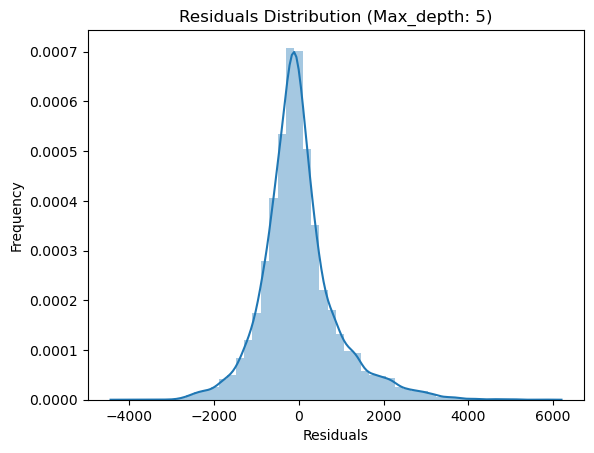

Test_size: 0.4



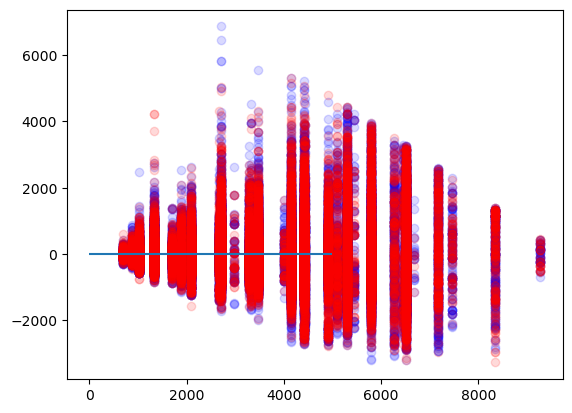

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


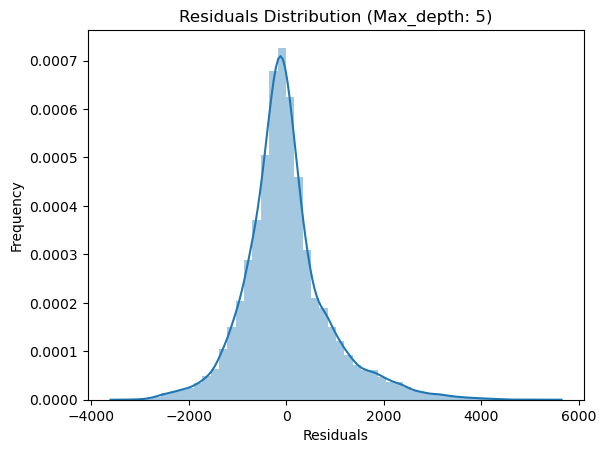

Test_size: 0.5



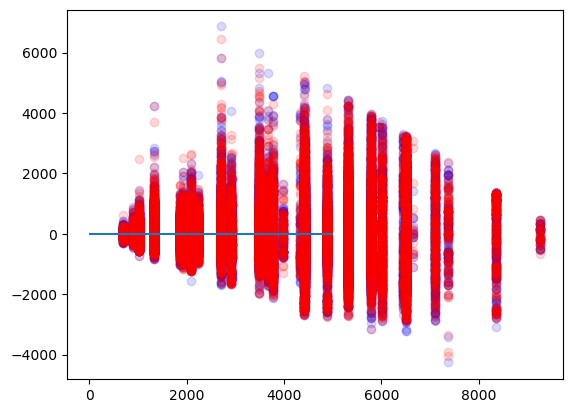

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


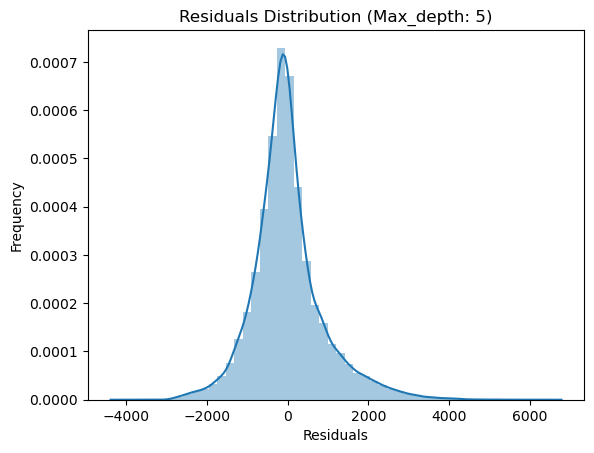

Test Set Results:
   Size  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0 0.200          785024.988                  886.016              625.830   
1 0.400          787272.587                  887.284              628.916   
2 0.500          789329.100                  888.442              629.285   

    R^2  
0 0.806  
1 0.804  
2 0.804  

Train Set Results:
   Size  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0 0.200          784258.145                  885.584              628.021   
1 0.400          781335.688                  883.932              626.341   
2 0.500          778897.629                  882.552              625.870   

    R^2  
0 0.805  
1 0.806  
2 0.806  

DataFrame: data_wo_features
--------------------------------

Test_size: 0.2



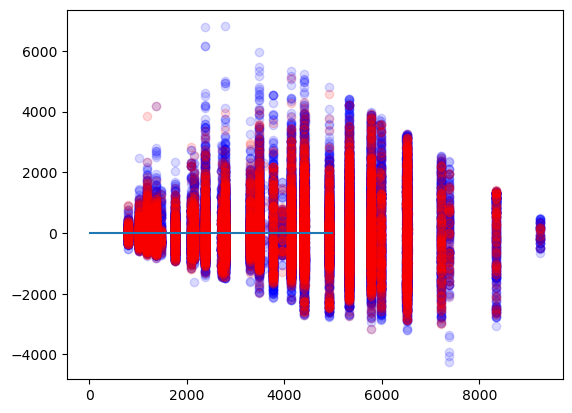

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


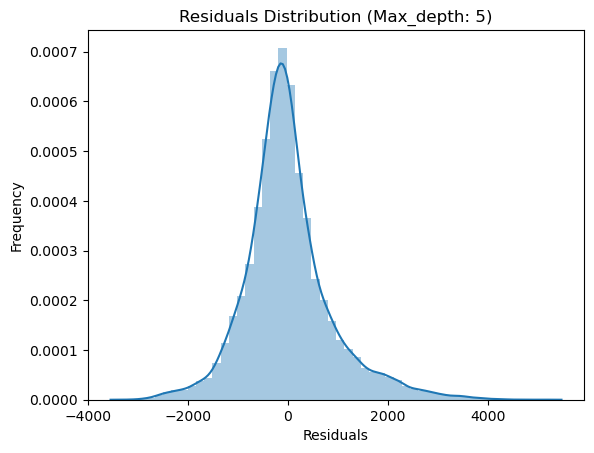

Test_size: 0.4



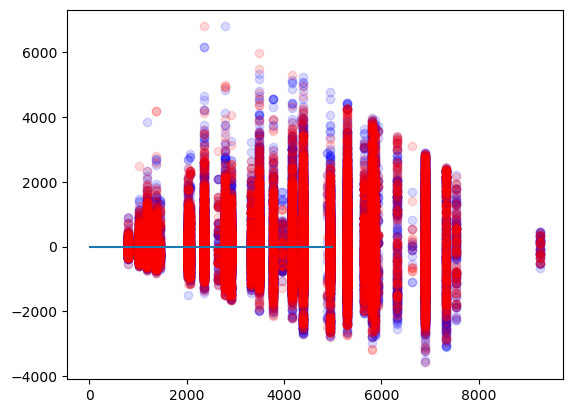

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


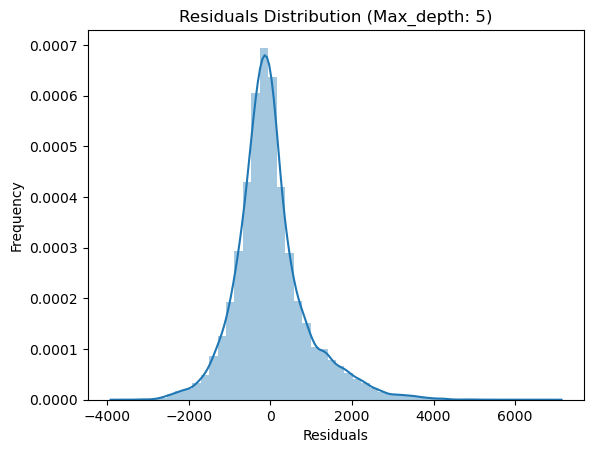

Test_size: 0.5



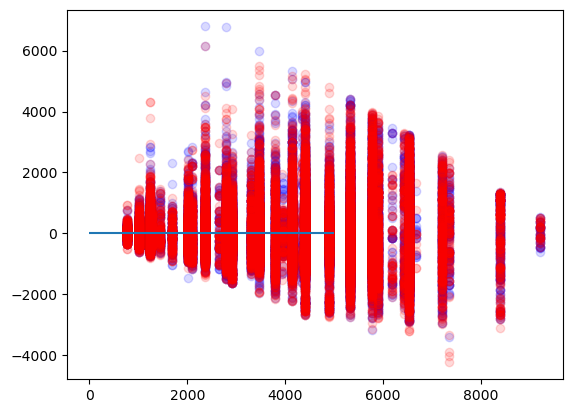

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


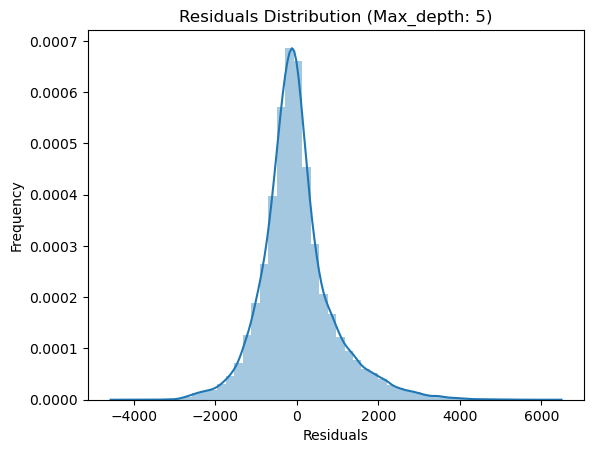

Test Set Results:
   Size  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0 0.200          782852.265                  884.789              632.014   
1 0.400          793676.936                  890.885              634.857   
2 0.500          796648.903                  892.552              634.764   

    R^2  
0 0.805  
1 0.802  
2 0.802  

Train Set Results:
   Size  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0 0.200          793740.533                  890.921              633.680   
1 0.400          797630.548                  893.102              637.260   
2 0.500          792911.327                  890.456              634.583   

    R^2  
0 0.803  
1 0.802  
2 0.803  



In [13]:
data_types = [data, data_min_max_scaled, data_wo_features]
test_size_values = [0.2, 0.4, 0.5]

for df in data_types:
    df_name = next(key for key, value in locals().items() if value is df)
    print(f"DataFrame: {df_name}")
    print("--------------------------------")
    print()
    
    X = df.drop('price', axis=1)
    y = df['price']
    results = {}
    for size in test_size_values:
        print(f"Test_size: {size}")
        print()
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
        lr2 = tree.DecisionTreeRegressor(max_depth=5)
        lr2.fit(X_train, y_train)
        
        #### Predict the test set
        pred_test = lr2.predict(X_test)
        mse_test = mean_squared_error(y_test, pred_test)
        rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
        mae_test = mean_absolute_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        #### Predict the train set
        pred_train = lr2.predict(X_train)
        mse_train = mean_squared_error(y_train,pred_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        #### Print a scatterplot of the real y values of the test set against the predicted y values
        plt.scatter(pred_train, y_train-pred_train, c='b',alpha=0.15)
        plt.scatter(pred_test, y_test-pred_test, c='r',alpha=0.15)
        plt.hlines(y=0,xmin=0,xmax=5000)
        plt.show()

        sns.distplot(y_test-pred_test)
        plt.title(f"Residuals Distribution (Max_depth: {5})")
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.show()

        results[size] = {
            'test': {'mse': mse_test, 'rmse': rmse_test, 'mae': mae_test, 'r2': r2_test, 'y_pred': pred_test},
            'train': {'mse': mse_train, 'rmse': rmse_train, 'mae': mae_train, 'r2': r2_train, 'y_pred': pred_train}
        }
        

    results_df_test = pd.DataFrame([(size, res['test']['mse'], res['test']['rmse'], res['test']['mae'], res['test']['r2']) for size, res in results.items()],
                              columns=['Size', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])
    
    results_df_train = pd.DataFrame([(size, res['train']['mse'], res['train']['rmse'], res['train']['mae'], res['train']['r2']) for size, res in results.items()],
                              columns=['Size', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])
    
    print("Test Set Results:")
    print(results_df_test)
    print()
    
    print("Train Set Results:")
    print(results_df_train)
    print()
        

## Conclusion
Relatively similar results were obtained in the different distributions

Let's try to test RandomForestRegressor

## Use RandomForestRegressor

Test MAE:  616.7795
Test MSE:  765587.6427
Test RMSE:  874.9787
Test R2:  0.8118

Train MAE:  613.5500
Train MSE:  751330.6995
Train RMSE:  866.7933
Train R2:  0.8123


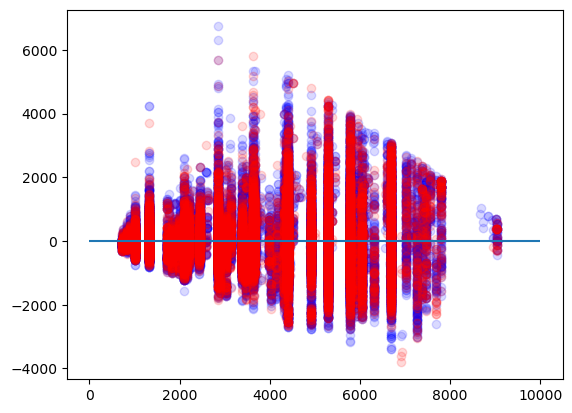

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


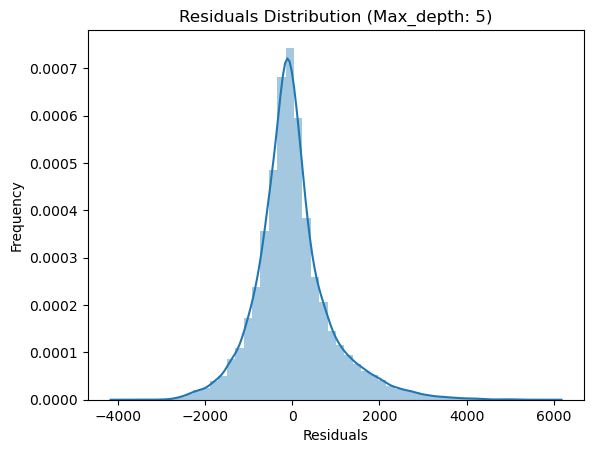

In [14]:
from sklearn.ensemble import RandomForestRegressor

X = data_min_max_scaled.drop('price', axis=1)
y = data_min_max_scaled['price']

#data_wo_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Random_Forest = RandomForestRegressor(n_estimators=200, max_depth=5)
Random_Forest.fit(X_train, y_train)
pred_train = Random_Forest.predict(X_train)
pred_test = Random_Forest.predict(X_test)

print('Test MAE: ', "%.4f" % mean_absolute_error(y_test, pred_test))
print('Test MSE: ', "%.4f" % mean_squared_error(y_test, pred_test))
print('Test RMSE: ', "%.4f" % np.sqrt(mean_squared_error(y_test, pred_test)))
print('Test R2: ', "%.4f" % r2_score(y_test, pred_test))
print()
print('Train MAE: ', "%.4f" % mean_absolute_error(y_train,pred_train))
print('Train MSE: ', "%.4f" % mean_squared_error(y_train,pred_train))
print('Train RMSE: ', "%.4f" % np.sqrt(mean_squared_error(y_train,pred_train)))
print('Train R2: ', "%.4f" % r2_score(y_train,pred_train))

# Print scatter plot
plt.scatter(pred_train, y_train-pred_train, c='b',alpha=0.15)
plt.scatter(pred_test, y_test-pred_test, c='r',alpha=0.15)
plt.hlines(y=0,xmin=0,xmax=10000)
plt.show()

#### Print a histogram the residuals
sns.distplot(y_test-pred_test)
plt.title(f"Residuals Distribution (Max_depth: {5})")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

print()

## Conclusion

It can be seen that similar errors were obtained at depth =5 and therefore, it can be said that this model is similar to the previous one and gives similar indicators.

However, the results are still not good enough compared to linear regression and therefore the model is still less suitable.

## Use feature importance

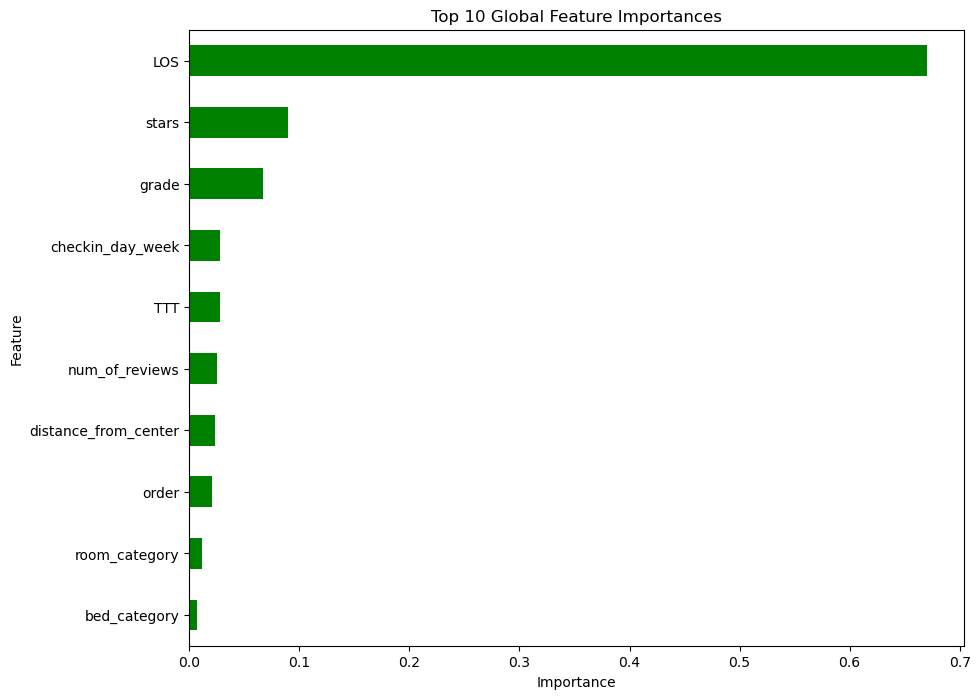

In [15]:
Random_Forest = RandomForestRegressor(n_estimators=200)
Random_Forest.fit(X_train, y_train)

data = data_min_max_scaled.drop('price', axis=1)
feature_names = data.columns[0:]

# Convert feature importances to a pandas Series
global_importances = pd.Series(Random_Forest.feature_importances_, index=feature_names)

# Sort the importances Series and select the top 10 features
global_importances_sorted = global_importances.nlargest(10)

# Reverse the Series to have the highest importance at the top for plotting
global_importances_sorted = global_importances_sorted.iloc[::-1]

# Plot the sorted top 10 feature importances
plt.figure(figsize=(10, 8))
global_importances_sorted.plot(kind='barh', color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Global Feature Importances")
plt.show()

## Use feature importance - Black box

                             feature  importance
9                                LOS       1.509
5                              stars       0.215
0                              grade       0.134
8                                TTT       0.062
38                  checkin_day_week       0.061
4               distance_from_center       0.040
2                     num_of_reviews       0.039
10                             order       0.031
11                     room_category       0.012
27  neighborhood_Manhattan, New York       0.012


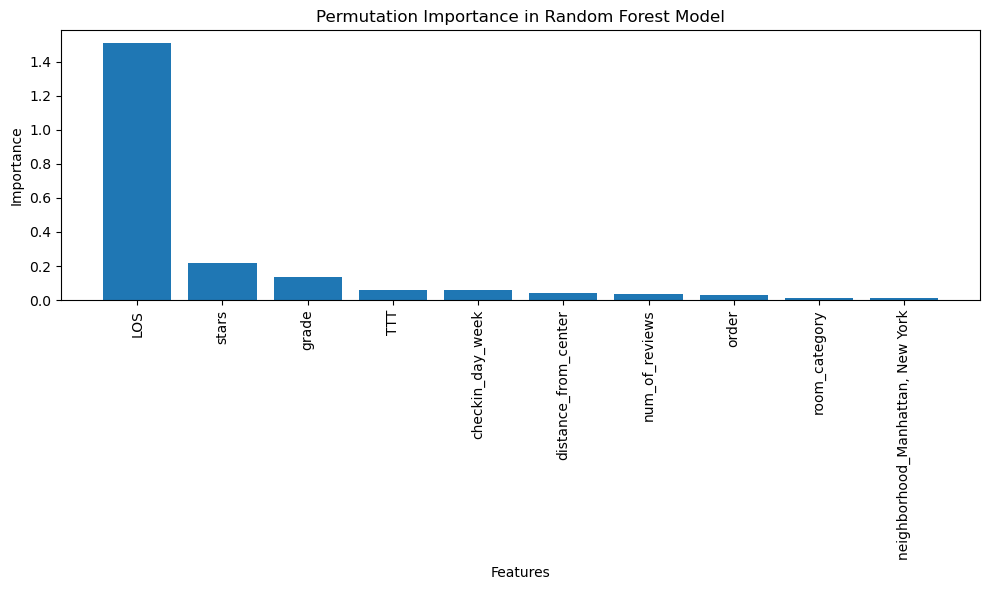

In [16]:
from sklearn.inspection import permutation_importance

# Calculating the importance of features using Permutation Importance
perm_importance = permutation_importance(Random_Forest, X_test, y_test, n_repeats=5)

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)[:10]

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance in Random Forest Model')
plt.tight_layout()
plt.show()

# XGBoost (Extreme Gradient Boosting)

Test MAE:  399.7663
Test MSE:  309541.1540
Test RMSE:  556.3642
Test R2:  0.9223

Train MAE:  394.3243
Train MSE:  303273.4237
Train RMSE:  550.7027
Train R2:  0.9249


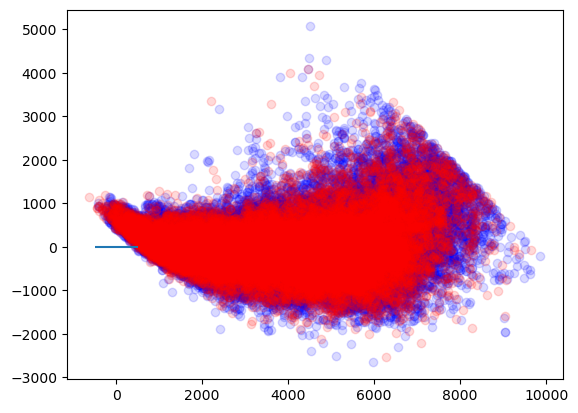

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


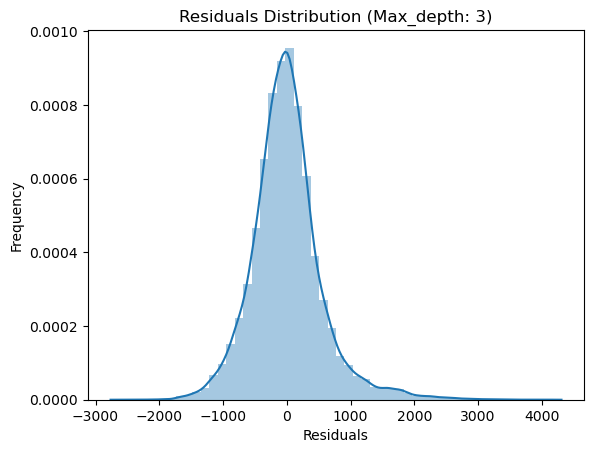

In [17]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=2)

model.fit(X_train, y_train)

# Make predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Evaluation
print('Test MAE: ', "%.4f" % mean_absolute_error(y_test, pred_test))
print('Test MSE: ', "%.4f" % mean_squared_error(y_test, pred_test))
print('Test RMSE: ', "%.4f" % np.sqrt(mean_squared_error(y_test, pred_test)))
print('Test R2: ', "%.4f" % r2_score(y_test, pred_test))
print()
print('Train MAE: ', "%.4f" % mean_absolute_error(y_train, pred_train))
print('Train MSE: ', "%.4f" % mean_squared_error(y_train, pred_train))
print('Train RMSE: ', "%.4f" % np.sqrt(mean_squared_error(y_train, pred_train)))
print('Train R2: ', "%.4f" % r2_score(y_train, pred_train))

# Print scatter plot
plt.scatter(pred_train, y_train-pred_train, c='b',alpha=0.15)
plt.scatter(pred_test, y_test-pred_test, c='r',alpha=0.15)
plt.hlines(y=0,xmin=-500,xmax=500)
plt.show()
print()

# Print a histogram the residuals
sns.distplot(y_test-pred_test)
plt.title(f"Residuals Distribution (Max_depth: {3})")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print()

## Split the data to training set and test set: TTT < 25 for test

Test MAE:  521.0650
Test MSE:  623473.1035
Test RMSE:  789.6031
Test R2:  0.8510

Train MAE:  275.0996
Train MSE:  152105.8760
Train RMSE:  390.0075
Train R2:  0.9545


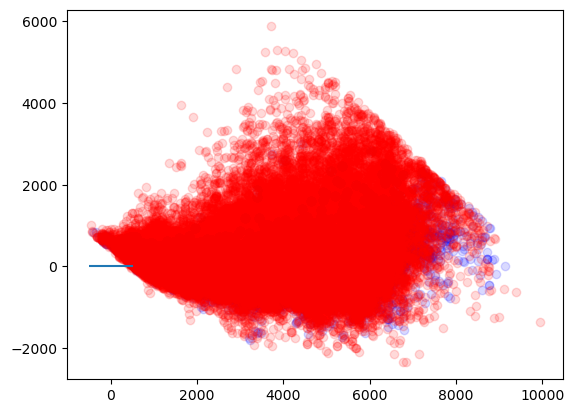

C:\Users\ygastfraind\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


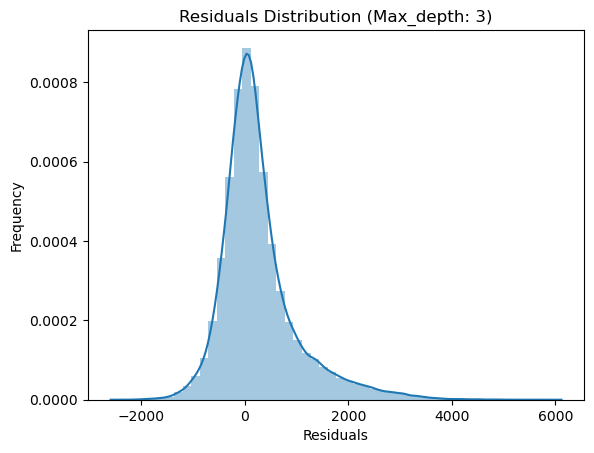

In [18]:
# Dividing the data into groups according to TTT valuesX_train = data_min_max_scaled[data_min_max_scaled['TTT'] >= 25].drop('price', axis=1)
y_train = data_min_max_scaled[data_min_max_scaled['TTT'] >= 25]['price']

X_test = data_min_max_scaled[data_min_max_scaled['TTT'] < 25].drop('price', axis=1)
y_test = data_min_max_scaled[data_min_max_scaled['TTT'] < 25]['price']

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=2)

model.fit(X_train, y_train)

# Make predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Evaluation
print('Test MAE: ', "%.4f" % mean_absolute_error(y_test, pred_test))
print('Test MSE: ', "%.4f" % mean_squared_error(y_test, pred_test))
print('Test RMSE: ', "%.4f" % np.sqrt(mean_squared_error(y_test, pred_test)))
print('Test R2: ', "%.4f" % r2_score(y_test, pred_test))
print()
print('Train MAE: ', "%.4f" % mean_absolute_error(y_train, pred_train))
print('Train MSE: ', "%.4f" % mean_squared_error(y_train, pred_train))
print('Train RMSE: ', "%.4f" % np.sqrt(mean_squared_error(y_train, pred_train)))
print('Train R2: ', "%.4f" % r2_score(y_train, pred_train))

# Print scatter plot
plt.scatter(pred_train, y_train-pred_train, c='b',alpha=0.15)
plt.scatter(pred_test, y_test-pred_test, c='r',alpha=0.15)
plt.hlines(y=0,xmin=-500,xmax=500)
plt.show()
print()

# Print a histogram the residuals
sns.distplot(y_test-pred_test)
plt.title(f"Residuals Distribution (Max_depth: {3})")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print()

## Printing R^2 results

0.8510126642912911
0.9544971224919212


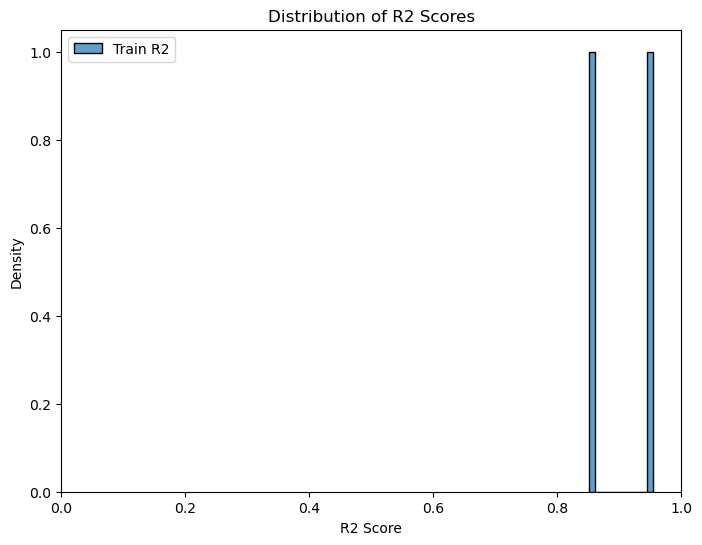

Text(0, 0.5, 'Density')

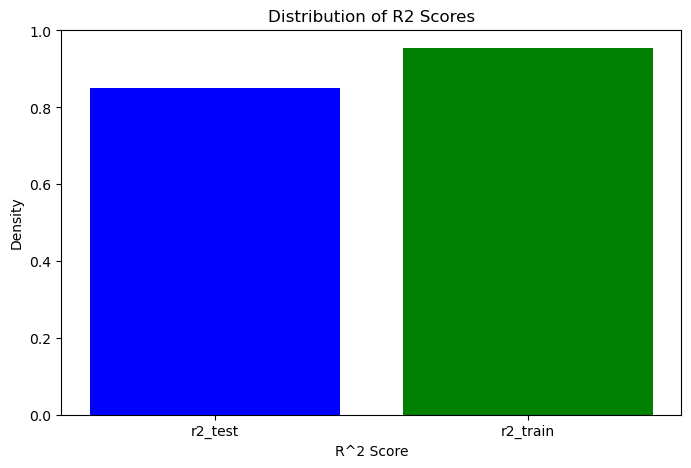

In [19]:
r2_test = r2_score(y_test, pred_test)
r2_train = r2_score(y_train,pred_train)

print(r2_test)
print(r2_train)

plt.figure(figsize=(8, 6))
sns.histplot([r2_train, r2_test], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of R2 Scores')
plt.xlabel('R2 Score')
plt.ylabel('Density')
plt.xlim(0, 1)  # Limit the possible x-to-R2 bounds (between 0 and 1)
plt.legend(['Train R2', 'Test R2'])
plt.show()

r2_scores = [r2_test, r2_train]
labels = ['r2_test', 'r2_train'] 


plt.figure(figsize=(8, 5))
plt.bar(labels, r2_scores, color=['blue', 'green']) 
plt.title('Distribution of R2 Scores')
plt.xlabel('R^2 Score') 
plt.ylabel('Density')